In [836]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_fontja

file_path_10 = '/Users/ryoma/BLP/yosoku/【10月】分析+day.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_10 = pd.read_excel(file_path_10, sheet_name=sheet_name)
data_10.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-10-01 00:00:00,2024-10-02 00:00:00,2024-10-03 00:00:00,2024-10-04 00:00:00,2024-10-05 00:00:00,2024-10-06 00:00:00,2024-10-07 00:00:00,2024-10-08 00:00:00,...,2024-10-23 00:00:00,2024-10-24 00:00:00,2024-10-25 00:00:00,2024-10-26 00:00:00,2024-10-27 00:00:00,2024-10-28 00:00:00,2024-10-29 00:00:00,2024-10-30 00:00:00,2024-10-31 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,1756,2125,2433,1490,0,2455,2921,...,2941,2498,2941,1249,0,2893,2264,297,170,57837
4,NaN,作業時間(分),0,4302,4740,7002,4620,0,5544,7026,...,8190,5871,7326,4485,0,6240,5694,771,486,154956


In [837]:
# Excelデータの読み込み
file_path_11 = '/Users/ryoma/BLP/yosoku/【11月】分析+day.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_11 = pd.read_excel(file_path_11, sheet_name=sheet_name)
data_11.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-11-01 00:00:00,2024-11-02 00:00:00,2024-11-03 00:00:00,2024-11-04 00:00:00,2024-11-05 00:00:00,2024-11-06 00:00:00,2024-11-07 00:00:00,2024-11-08 00:00:00,...,2024-11-24 00:00:00,2024-11-25 00:00:00,2024-11-26 00:00:00,2024-11-27 00:00:00,2024-11-28 00:00:00,2024-11-29 00:00:00,2024-11-30 00:00:00,2024-12-01 00:00:00,合計,NaN
2,NaN,日付,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,NaN,NaN
3,A-PaLS,件数,0,2199,0,0,1172,1894,2912,2794,...,1332,2867,3622,3856,2360,1597,1582,0,59330,NaN
4,NaN,作業時間(分),0,5262,0,0,2070,3567,8088,7374,...,4302,9009,7893,9682,8725,7200,4905,0,172247,NaN


In [838]:
file_path_9 = '/Users/ryoma/BLP/yosoku/【9月】分析+day.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_9 = pd.read_excel(file_path_9, sheet_name=sheet_name)
data_9.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-09-01 00:00:00,2024-09-02 00:00:00,2024-09-03 00:00:00,2024-09-04 00:00:00,2024-09-05 00:00:00,2024-09-06 00:00:00,2024-09-07 00:00:00,2024-09-08 00:00:00,...,2024-09-23 00:00:00,2024-09-24 00:00:00,2024-09-25 00:00:00,2024-09-26 00:00:00,2024-09-27 00:00:00,2024-09-28 00:00:00,2024-09-29 00:00:00,2024-09-30 00:00:00,2024-10-01 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,0,1289,1785,1992,2281,1805,0,...,2687,2538,3351,3871,2908,1343,0,863,0,54997
4,NaN,作業時間(分),0,0,3285,3420,6699,6978,5190,0,...,6945,5811,8265,7998,8130,2952,0,2169,0,156935


In [839]:
file_path_12 = '/Users/ryoma/BLP/yosoku/【12月】分析+day.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_12 = pd.read_excel(file_path_12, sheet_name=sheet_name)
data_12.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-12-01 00:00:00,2024-12-02 00:00:00,2024-12-03 00:00:00,2024-12-04 00:00:00,2024-12-05 00:00:00,2024-12-06 00:00:00,2024-12-07 00:00:00,2024-12-08 00:00:00,...,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00,2024-12-28 00:00:00,2024-12-29 00:00:00,2024-12-30 00:00:00,2024-12-31 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,0,1304,1905,2948,2008,2435,0,...,2509,3039,2603,1991,2509,1275,0,0,0,52980
4,NaN,作業時間(分),0,0,2475,4917,7047,6663,5514,0,...,7068,7008,6417,7008,6795,3810,0,0,0,151783


In [840]:
# 行列を逆にする
data_10 = data_10.T
# 1行目を列名にする
data_10.columns = data_10.iloc[1]
# 0,1行目を削除
data_10 = data_10.drop(data_10.index[[0, 1]])
data_10.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),目標件数,NaN,作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,予測,買い合わせ平均,テイケイ,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-10-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,0
Unnamed: 3,NaN,2024-10-02 00:00:00,2,1756,4302,NaN,NaN,7,5,12,4,358.5,439,NaN,NaN,0,NaN,2,2.449886,177.559275
Unnamed: 4,NaN,2024-10-03 00:00:00,3,2125,4740,NaN,NaN,6,6,12,4,395,531.25,NaN,NaN,0,NaN,3,2.230588,195.015823
Unnamed: 5,NaN,2024-10-04 00:00:00,4,2433,7002,NaN,NaN,12,6,18,6,389,405.5,NaN,NaN,0,NaN,4,2.877928,151.150386
Unnamed: 6,NaN,2024-10-05 00:00:00,5,1490,4620,NaN,NaN,13,2,15,5,308,298,NaN,NaN,0,NaN,5,3.100671,140.292208


In [841]:
# 行列を逆にする
data_11 = data_11.T
# 1行目を列名にする
data_11.columns = data_11.iloc[1]
# 0,1行目を削除
data_11 = data_11.drop(data_11.index[[0, 1]])
data_11.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),目標件数,作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,予測,買い合わせ,テイケイ,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-11-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
Unnamed: 3,NaN,2024-11-02 00:00:00,2,2199,5262,NaN,13,5,18,6,292.333333,366.5,NaN,NaN,0,2,2.392906,181.787343
Unnamed: 4,NaN,2024-11-03 00:00:00,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,0
Unnamed: 5,NaN,2024-11-04 00:00:00,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,0,0
Unnamed: 6,NaN,2024-11-05 00:00:00,5,1172,2070,NaN,0,6,6,2,345,586,NaN,NaN,0,5,1.766212,246.289855


In [842]:
# 行列を逆にする
data_9 = data_9.T
# 1行目を列名にする
data_9.columns = data_9.iloc[1]
# 0,1行目を削除
data_9 = data_9.drop(data_9.index[[0, 1]])
data_9.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,1日あたりの作業件数,予測,買い合わせ平均,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-09-01 00:00:00,1,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
Unnamed: 3,NaN,2024-09-02 00:00:00,2,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
Unnamed: 4,NaN,2024-09-03 00:00:00,3,1289,3285,6,3,0,9,3,365,429.666667,NaN,NaN,NaN,NaN,3,2.548487,170.689498
Unnamed: 5,NaN,2024-09-04 00:00:00,4,1785,3420,6,3,0,9,3,380,595,NaN,NaN,NaN,NaN,4,1.915966,227.039474
Unnamed: 6,NaN,2024-09-05 00:00:00,5,1992,6699,14,4,0,18,6,372.166667,332,NaN,NaN,NaN,NaN,5,3.362952,129.350649


In [843]:
# 行列を逆にする
data_12 = data_12.T
# 1行目を列名にする
data_12.columns = data_12.iloc[1]
# 0,1行目を削除
data_12 = data_12.drop(data_12.index[[0, 1]])
data_12.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,1日あたりの作業件数,予測,買い合わせ平均,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-12-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
Unnamed: 3,NaN,2024-12-02 00:00:00,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
Unnamed: 4,NaN,2024-12-03 00:00:00,3,1304,2475,8,4,NaN,12,4,206.25,326,NaN,NaN,NaN,NaN,3,1.898006,229.187879
Unnamed: 5,NaN,2024-12-04 00:00:00,4,1905,4917,13,5,NaN,18,6,273.166667,317.5,NaN,NaN,NaN,NaN,4,2.581102,168.532642
Unnamed: 6,NaN,2024-12-05 00:00:00,5,2948,7047,13,5,3,21,7,335.571429,421.142857,NaN,NaN,NaN,NaN,5,2.390434,181.975309


In [844]:
# 欠損値を探す
data_10.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
目標件数           32
NaN            32
作業人数            4
リーダー人数          4
合計作業人数          2
作業ライン           5
1人あたりの作業時間      5
1本あたりの平均作業数     5
予測             32
買い合わせ平均        32
テイケイ            0
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [845]:
# 欠損値を探す
data_11.isnull().sum()

Unnamed: 1
NaN            33
項目              1
日付              2
件数              1
作業時間(分)         1
目標件数           33
作業人数            7
リーダー人数          7
合計作業人数          8
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数     8
予測             33
買い合わせ          33
テイケイ            1
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [846]:
# 欠損値を探す
data_9.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
作業人数            7
リーダー人数          7
テイケイ            2
合計作業人数          4
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数     8
1日あたりの作業件数     32
予測             32
買い合わせ平均        32
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [847]:
# 欠損値を探す
data_12.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
作業人数            8
リーダー人数          8
テイケイ           11
合計作業人数          3
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数    11
1日あたりの作業件数     32
予測             32
買い合わせ平均        32
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [848]:
data_10 = data_10.drop(data_10.columns[[0, 1, 5, 12,13, 14,15,18,19]], axis=1)
data_10.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,2,1756,4302,7,5,12,4,358.5
Unnamed: 4,3,2125,4740,6,6,12,4,395
Unnamed: 5,4,2433,7002,12,6,18,6,389
Unnamed: 6,5,1490,4620,13,2,15,5,308


In [849]:
data_11 = data_11.drop(data_11.columns[[0, 1, 5, 11,12, 13,14,15,16,17]], axis=1)
data_11.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333
Unnamed: 4,3,0,0,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,4,0,0,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,5,1172,2070,0,6,6,2,345


In [850]:
data_9 = data_9.drop(data_9.columns[[0, 1,7, 11,12, 13, 14, 15,16,17,18]], axis=1)
data_9.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,2,0,0,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,3,1289,3285,6,3,9,3,365
Unnamed: 5,4,1785,3420,6,3,9,3,380
Unnamed: 6,5,1992,6699,14,4,18,6,372.166667


In [851]:
data_12 = data_12.drop(data_12.columns[[0, 1, 7,11,12, 13, 14, 15,16,17,18]], axis=1)
data_12.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,2,0,0,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,3,1304,2475,8,4,12,4,206.25
Unnamed: 5,4,1905,4917,13,5,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,21,7,335.571429


In [852]:
# NaNを全て0に変換
data_10 = data_10.fillna(0)
data_10.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_17120/2710974917.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_10 = data_10.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.0
Unnamed: 3,2,1756,4302,7,5,12,4,358.5
Unnamed: 4,3,2125,4740,6,6,12,4,395.0
Unnamed: 5,4,2433,7002,12,6,18,6,389.0
Unnamed: 6,5,1490,4620,13,2,15,5,308.0


In [853]:
# NaNを全て0に変換
data_11 = data_11.fillna(0)
data_11.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_17120/3095783728.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_11 = data_11.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333
Unnamed: 4,3,0,0,0,0,0,0,0.000000
Unnamed: 5,4,0,0,0,0,0,0,0.000000
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000


In [854]:
# NaNを全て0に変換
data_9 = data_9.fillna(0)
data_9.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_17120/2000210121.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_9 = data_9.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1289,3285,6,3,9,3,365.000000
Unnamed: 5,4,1785,3420,6,3,9,3,380.000000
Unnamed: 6,5,1992,6699,14,4,18,6,372.166667


In [855]:
# NaNを全て0に変換
data_12 = data_12.fillna(0)
data_12.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_17120/1371613324.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_12 = data_12.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1304,2475,8,4,12,4,206.250000
Unnamed: 5,4,1905,4917,13,5,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,21,7,335.571429


In [856]:
# 0列目のデータを表示
data_10.iloc[:, 0]
data_10

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000
Unnamed: 7,6,0,0,11,4,15,5,0.000000
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857


In [857]:
# 0列目のデータを表示
data_11.iloc[:, 0]
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333
Unnamed: 4,3,0,0,0,0,0,0,0.000000
Unnamed: 5,4,0,0,0,0,0,0,0.000000
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000
Unnamed: 11,10,0,0,0,0,0,0,0.000000


In [858]:
# 0列目のデータを表示
data_9.iloc[:, 0]
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1289,3285,6,3,9,3,365.000000
Unnamed: 5,4,1785,3420,6,3,9,3,380.000000
Unnamed: 6,5,1992,6699,14,4,18,6,372.166667
Unnamed: 7,6,2281,6978,17,4,21,7,332.285714
Unnamed: 8,7,1805,5190,13,2,15,5,346.000000
Unnamed: 9,8,0,0,0,0,0,0,0.000000
Unnamed: 10,9,2122,6753,17,4,21,7,321.571429
Unnamed: 11,10,2813,8346,17,4,21,7,397.428571


In [859]:
# 0列目のデータを表示
data_12.iloc[:, 0]
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1304,2475,8,4,12,4,206.250000
Unnamed: 5,4,1905,4917,13,5,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,21,7,335.571429
Unnamed: 7,6,2008,6663,13,4,21,7,317.285714
Unnamed: 8,7,2435,5514,13,2,15,5,367.600000
Unnamed: 9,8,0,0,14,4,21,7,0.000000
Unnamed: 10,9,3419,7497,13,4,21,7,357.000000
Unnamed: 11,10,2992,7869,13,4,21,7,374.714286


In [860]:
# Unnamed: 33と34を削除
data_10 = data_10.drop(data_10.index[[31]])
data_10


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000
Unnamed: 7,6,0,0,11,4,15,5,0.000000
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857


In [861]:
# Unnamed: 33と34を削除
data_11 = data_11.drop(data_11.index[[31, 32]])
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333
Unnamed: 4,3,0,0,0,0,0,0,0.000000
Unnamed: 5,4,0,0,0,0,0,0,0.000000
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000
Unnamed: 11,10,0,0,0,0,0,0,0.000000


In [862]:
# Unnamed: 33と34を削除
data_9 = data_9.drop(data_9.index[[31]])
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1289,3285,6,3,9,3,365.000000
Unnamed: 5,4,1785,3420,6,3,9,3,380.000000
Unnamed: 6,5,1992,6699,14,4,18,6,372.166667
Unnamed: 7,6,2281,6978,17,4,21,7,332.285714
Unnamed: 8,7,1805,5190,13,2,15,5,346.000000
Unnamed: 9,8,0,0,0,0,0,0,0.000000
Unnamed: 10,9,2122,6753,17,4,21,7,321.571429
Unnamed: 11,10,2813,8346,17,4,21,7,397.428571


In [863]:
# Unnamed: 33と34を削除
data_12 = data_12.drop(data_12.index[[31]])
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1304,2475,8,4,12,4,206.250000
Unnamed: 5,4,1905,4917,13,5,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,21,7,335.571429
Unnamed: 7,6,2008,6663,13,4,21,7,317.285714
Unnamed: 8,7,2435,5514,13,2,15,5,367.600000
Unnamed: 9,8,0,0,14,4,21,7,0.000000
Unnamed: 10,9,3419,7497,13,4,21,7,357.000000
Unnamed: 11,10,2992,7869,13,4,21,7,374.714286


In [864]:
# 「件数」数が0の行を削除
data_10 = data_10[data_10['件数'] != 0]
data_10

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857
Unnamed: 12,11,2197,7491,17,4,21,7,356.714286
Unnamed: 13,12,1978,5634,16,2,18,6,313.000000


In [865]:
# 「件数」数が0の行を削除
data_11 = data_11[data_11['件数'] != 0]
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000
Unnamed: 12,11,2679,7782,17,4,21,7,370.571429
Unnamed: 13,12,2573,7017,18,3,21,7,334.142857
Unnamed: 14,13,1739,6612,18,3,21,7,314.857143
Unnamed: 15,14,2405,6405,17,4,21,7,305.000000


In [866]:
# 「件数」数が0の行を削除
data_9 = data_9[data_9['件数'] != 0]
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 4,3,1289,3285,6,3,9,3,365.000000
Unnamed: 5,4,1785,3420,6,3,9,3,380.000000
Unnamed: 6,5,1992,6699,14,4,18,6,372.166667
Unnamed: 7,6,2281,6978,17,4,21,7,332.285714
Unnamed: 8,7,1805,5190,13,2,15,5,346.000000
Unnamed: 10,9,2122,6753,17,4,21,7,321.571429
Unnamed: 11,10,2813,8346,17,4,21,7,397.428571
Unnamed: 12,11,2251,8009,17,4,21,7,381.380952
Unnamed: 13,12,2991,8109,17,4,21,7,386.142857
Unnamed: 14,13,2793,7836,17,4,21,7,373.142857


In [867]:
# 「件数」数が0の行を削除
data_12 = data_12[data_12['件数'] != 0]
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 4,3,1304,2475,8,4,12,4,206.250000
Unnamed: 5,4,1905,4917,13,5,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,21,7,335.571429
Unnamed: 7,6,2008,6663,13,4,21,7,317.285714
Unnamed: 8,7,2435,5514,13,2,15,5,367.600000
Unnamed: 10,9,3419,7497,13,4,21,7,357.000000
Unnamed: 11,10,2992,7869,13,4,21,7,374.714286
Unnamed: 12,11,1886,7983,14,3,21,7,380.142857
Unnamed: 13,12,2307,7574,14,4,21,7,360.666667
Unnamed: 14,13,2118,7395,14,4,21,7,352.142857


In [868]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_10 = data_10.mean()
original_std_10 = data_10.std()
print(original_mean_10)
print(original_std_10)

Unnamed: 1
日付              16.500000
件数            2224.500000
作業時間(分)       5959.846154
作業人数            14.346154
リーダー人数           3.423077
合計作業人数          17.769231
作業ライン            5.923077
1人あたりの作業時間     324.635165
dtype: float64
Unnamed: 1
日付               8.949860
件数             789.490633
作業時間(分)       1963.673979
作業人数             4.372114
リーダー人数           1.270372
合計作業人数           4.641618
作業ライン            1.547206
1人あたりの作業時間      75.081417
dtype: float64


In [869]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_11 = data_11.mean()
original_std_11 = data_11.std()
print(original_mean_11)
print(original_std_11)

Unnamed: 1
日付              17.200000
件数            2373.200000
作業時間(分)       6889.880000
作業人数            15.040000
リーダー人数           3.920000
合計作業人数          18.960000
作業ライン            6.320000
1人あたりの作業時間     364.869905
dtype: float64
Unnamed: 1
日付               8.276473
件数             675.897058
作業時間(分)       1746.216704
作業人数             5.223983
リーダー人数           2.100000
合計作業人数           4.217819
作業ライン            1.405940
1人あたりの作業時間      56.735581
dtype: float64


In [870]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_9 = data_9.mean()
original_std_9 = data_9.std()
print(original_mean_9)
print(original_std_9)

Unnamed: 1
日付              16.166667
件数            2291.541667
作業時間(分)       6538.958333
作業人数            15.250000
リーダー人数           3.125000
合計作業人数          18.375000
作業ライン            6.125000
1人あたりの作業時間     353.801587
dtype: float64
Unnamed: 1
日付               8.244454
件数             698.728160
作業時間(分)       1875.513483
作業人数             4.002716
リーダー人数           0.899879
合計作業人数           4.537884
作業ライン            1.512628
1人あたりの作業時間      46.951341
dtype: float64


In [871]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_12 = data_12.mean()
original_std_12 = data_12.std()
print(original_mean_12)
print(original_std_12)

Unnamed: 1
日付              15.565217
件数            2303.478261
作業時間(分)       6599.260870
作業人数            14.521739
リーダー人数           3.173913
合計作業人数          20.086957
作業ライン            6.695652
1人あたりの作業時間     326.301967
dtype: float64
Unnamed: 1
日付               7.873004
件数             522.434674
作業時間(分)       1346.534819
作業人数             2.086092
リーダー人数           1.072473
合計作業人数           2.294520
作業ライン            0.764840
1人あたりの作業時間      49.337949
dtype: float64


In [872]:
# データの結合
data_9_10_12 = pd.concat([data_9, data_10, data_12])

In [873]:
print(data_9_10_12)

Unnamed: 1   日付    件数  作業時間(分)  作業人数  リーダー人数  合計作業人数  作業ライン  1人あたりの作業時間
Unnamed: 4    3  1289     3285     6       3       9      3  365.000000
Unnamed: 5    4  1785     3420     6       3       9      3  380.000000
Unnamed: 6    5  1992     6699    14       4      18      6  372.166667
Unnamed: 7    6  2281     6978    17       4      21      7  332.285714
Unnamed: 8    7  1805     5190    13       2      15      5  346.000000
...          ..   ...      ...   ...     ...     ...    ...         ...
Unnamed: 25  24  3039     7008    16       3      21      7  333.714286
Unnamed: 26  25  2603     6417    16       3      21      7  305.571429
Unnamed: 27  26  1991     7008    15       3      21      7  333.714286
Unnamed: 28  27  2509     6795    15       3      21      7  323.571429
Unnamed: 29  28  1275     3810    18       3      21      7  181.428571

[73 rows x 8 columns]


In [874]:
# 対数変換
data_9_10_12 = data_9_10_12.apply(lambda x: np.log(x + 1))
data_11 = data_11.apply(lambda x: np.log(x + 1))

In [875]:
data_9_10_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 4,1.386294,7.162397,8.097426,1.945910,1.386294,2.302585,1.386294,5.902633
Unnamed: 5,1.609438,7.487734,8.137688,1.945910,1.386294,2.302585,1.386294,5.942799
Unnamed: 6,1.791759,7.597396,8.809863,2.708050,1.609438,2.944439,1.945910,5.922025
Unnamed: 7,1.945910,7.732808,8.850661,2.890372,1.609438,3.091042,2.079442,5.809000
Unnamed: 8,2.079442,7.498870,8.554682,2.639057,1.098612,2.772589,1.791759,5.849325
...,...,...,...,...,...,...,...,...
Unnamed: 25,3.218876,8.019613,8.854950,2.833213,1.386294,3.091042,2.079442,5.813277
Unnamed: 26,3.258097,7.864804,8.766862,2.833213,1.386294,3.091042,2.079442,5.725451
Unnamed: 27,3.295837,7.596894,8.854950,2.772589,1.386294,3.091042,2.079442,5.813277
Unnamed: 28,3.332205,7.828038,8.824089,2.772589,1.386294,3.091042,2.079442,5.782506


In [876]:
# カラム名の順番を合わせる
data_9_10_12 = data_9_10_12[data_11.columns]

In [877]:
# 目的変数と説明変数の設定
X_train = data_9_10_12.drop(columns='件数', errors='ignore')
y_train = data_9_10_12['件数']
X_test = data_11.drop(columns='件数', errors='ignore')
y_test = data_11['件数']

In [878]:
X_train

Unnamed: 1,日付,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 4,1.386294,8.097426,1.945910,1.386294,2.302585,1.386294,5.902633
Unnamed: 5,1.609438,8.137688,1.945910,1.386294,2.302585,1.386294,5.942799
Unnamed: 6,1.791759,8.809863,2.708050,1.609438,2.944439,1.945910,5.922025
Unnamed: 7,1.945910,8.850661,2.890372,1.609438,3.091042,2.079442,5.809000
Unnamed: 8,2.079442,8.554682,2.639057,1.098612,2.772589,1.791759,5.849325
...,...,...,...,...,...,...,...
Unnamed: 25,3.218876,8.854950,2.833213,1.386294,3.091042,2.079442,5.813277
Unnamed: 26,3.258097,8.766862,2.833213,1.386294,3.091042,2.079442,5.725451
Unnamed: 27,3.295837,8.854950,2.772589,1.386294,3.091042,2.079442,5.813277
Unnamed: 28,3.332205,8.824089,2.772589,1.386294,3.091042,2.079442,5.782506


In [879]:
from sklearn.model_selection import GridSearchCV

# モデルのインスタンス化
model = GradientBoostingRegressor(random_state=42)

# グリッドサーチのパラメータを設定
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# グリッドサーチの実行
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最良のパラメータを出力
print("Best parameters found: ", grid_search.best_params_)
print("Best R² score found: ", grid_search.best_score_)

# 最良パラメータでモデルを再学習
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# テストデータでの予測
y_pred = best_model.predict(X_test)

# 精度の評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test Mean Squared Error: {mse}')
print(f'Test R² Score: {r2}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Best R² score found:  0.39992342811588333
Test Mean Squared Error: 0.06258223656698686
Test R² Score: 0.2721402890081126


In [880]:
import joblib

# 学習済みのモデル（best_model）を保存
joblib.dump(best_model, "warehouse_model.pkl")

print("Model saved successfully.")



Model saved successfully.


In [881]:
# 保存したモデルをロード
best_model = joblib.load("warehouse_model.pkl")

print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
# 新しいデータ (X_new) に対して予測
y_new_pred = best_model.predict(X_test)
# 予測結果を元に戻す
y_pred_original = np.exp(y_new_pred)
y_test_original = np.exp(y_test)

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    print(f'Predicted: {y_pred_original[i]}')
    print(f'Actual: {y_test_original.iloc[i]}')
    print(f'Difference: {y_pred_original[i] - y_test_original.iloc[i]}')
    print('----------')



Predicted: 1961.3710097777084
Actual: 2199.9999999999995
Difference: -238.62899022229112
----------
Predicted: 551.2231476599834
Actual: 1173.0000000000005
Difference: -621.7768523400171
----------
Predicted: 1319.7111718657109
Actual: 1895.0000000000002
Difference: -575.2888281342894
----------
Predicted: 2550.3218586137427
Actual: 2912.999999999999
Difference: -362.67814138625636
----------
Predicted: 2137.4914956806897
Actual: 2795.0000000000005
Difference: -657.5085043193108
----------
Predicted: 3298.738979545291
Actual: 3177.0000000000014
Difference: 121.73897954528957
----------
Predicted: 2021.4412246480972
Actual: 2680.0
Difference: -658.5587753519028
----------
Predicted: 2615.062804136773
Actual: 2574.000000000001
Difference: 41.06280413677223
----------
Predicted: 2552.670759570639
Actual: 1740.0000000000005
Difference: 812.6707595706384
----------
Predicted: 2497.200160488042
Actual: 2405.999999999999
Difference: 91.20016048804291
----------
Predicted: 2850.282333870081
Ac

In [905]:
# 表にして表示
df = pd.DataFrame({'Predicted': y_pred_original, 'Actual': y_test_original, 'Difference': y_pred_original - y_test_original})
df

,Predicted,Actual,Difference
Unnamed: 3,1961.371010,2200.0,-238.628990
Unnamed: 6,551.223148,1173.0,-621.776852
Unnamed: 7,1319.711172,1895.0,-575.288828
Unnamed: 8,2550.321859,2913.0,-362.678141
Unnamed: 9,2137.491496,2795.0,-657.508504
Unnamed: 10,3298.738980,3177.0,121.738980
Unnamed: 12,2021.441225,2680.0,-658.558775
Unnamed: 13,2615.062804,2574.0,41.062804
Unnamed: 14,2552.670760,1740.0,812.670760
Unnamed: 15,2497.200160,2406.0,91.200160


In [883]:
# 全てのデータに対して
# 予測を行う
y_pred = best_model.predict(X_test)

# 予測結果を元に戻す
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    print(f'Predicted: {y_pred_original[i]}')
    print(f'Actual: {y_test_original.iloc[i]}')
    print(f'Difference: {y_pred_original[i] - y_test_original.iloc[i]}')
    print('----------')

Predicted: 1972.371276432227
Actual: 2199.9999999999995
Difference: -227.62872356777257
----------
Predicted: 597.1452468086495
Actual: 1173.0000000000005
Difference: -575.8547531913509
----------
Predicted: 1259.4898411885022
Actual: 1895.0000000000002
Difference: -635.5101588114981
----------
Predicted: 2556.2800631984314
Actual: 2912.999999999999
Difference: -356.71993680156766
----------
Predicted: 2343.3810683157976
Actual: 2795.0000000000005
Difference: -451.61893168420283
----------
Predicted: 2954.435036667152
Actual: 3177.0000000000014
Difference: -222.5649633328494
----------
Predicted: 2234.109113842867
Actual: 2680.0
Difference: -445.8908861571331
----------
Predicted: 2343.3810683157976
Actual: 2574.000000000001
Difference: -230.6189316842033
----------
Predicted: 2296.027818652593
Actual: 1740.0000000000005
Difference: 556.0278186525925
----------
Predicted: 2296.027818652593
Actual: 2405.999999999999
Difference: -109.97218134740615
----------
Predicted: 2574.875990446966

In [884]:
# 表にして表示
df = pd.DataFrame({'Predicted': y_pred_original, 'Actual': y_test_original, 'Difference': y_pred_original - y_test_original})
df

,Predicted,Actual,Difference
Unnamed: 3,1972.371276,2200.0,-227.628724
Unnamed: 6,597.145247,1173.0,-575.854753
Unnamed: 7,1259.489841,1895.0,-635.510159
Unnamed: 8,2556.280063,2913.0,-356.719937
Unnamed: 9,2343.381068,2795.0,-451.618932
Unnamed: 10,2954.435037,3177.0,-222.564963
Unnamed: 12,2234.109114,2680.0,-445.890886
Unnamed: 13,2343.381068,2574.0,-230.618932
Unnamed: 14,2296.027819,1740.0,556.027819
Unnamed: 15,2296.027819,2406.0,-109.972181


In [885]:
# differenceの絶対値を合計
df['Difference'].abs().sum()
print(df['Difference'].abs().sum())

10591.269173441366


In [886]:
# differenceの合計
df['Difference'].sum()
print(df['Difference'].sum())

-2130.3427186504396


In [887]:
# differenceの標準偏差を取得
df['Difference'].std()
print(df['Difference'].std())

488.951040845952


In [888]:
# differenceの平均
df['Difference'].mean()
print(df['Difference'].mean())


-85.21370874601759


In [889]:
# 予測結果がプラス・マイナス100件に収まっている数を数える
# プラス・マイナス100件に収まっている数をカウントする変数
within_100_count = 0

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    diff = y_pred_original[i] - y_test_original.iloc[i]
    
    # 差がプラス・マイナス100件に収まっている場合
    if abs(diff) <= 100:
        within_100_count += 1

# 結果を表示
print(f'プラス・マイナス100件に収まっている数: {within_100_count}')

プラス・マイナス100件に収まっている数: 1


In [890]:
# 特徴量重要度を表示
feature_importances = best_model.feature_importances_
features = data_9_10_12.drop(columns='件数', errors='ignore').columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
df

,features,importance
1,作業時間(分),0.389588
2,作業人数,0.177474
4,合計作業人数,0.146600
5,作業ライン,0.138500
6,1人あたりの作業時間,0.114693
0,日付,0.031464
3,リーダー人数,0.001681



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


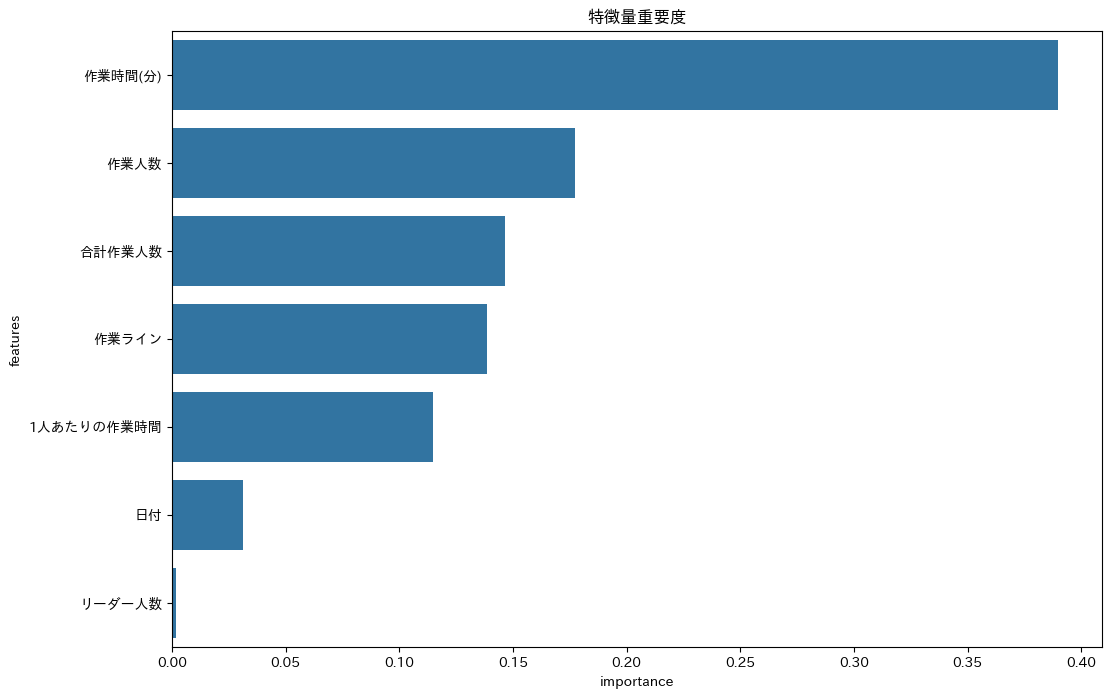

In [891]:
# 特徴量重要度を可視化
%pip install matplotlib seaborn japanize-matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import japanize_matplotlib
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=df)
plt.title('特徴量重要度')
plt.show()

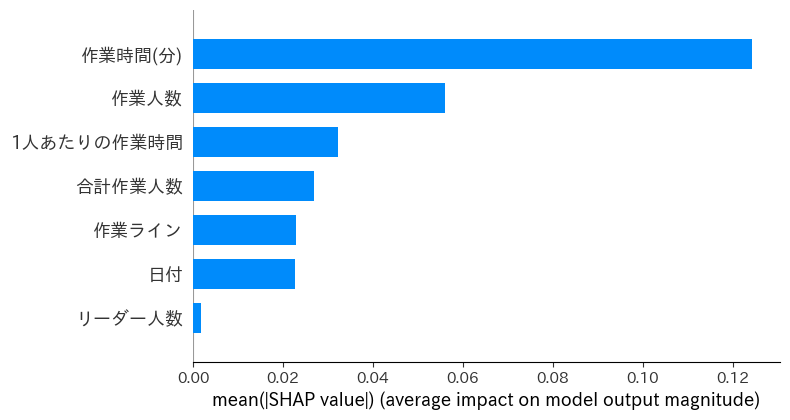

In [892]:
# SHAP値を計算
import shap
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# SHAP値を可視化
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [893]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# モデルのインスタンス化
model = GradientBoostingRegressor(random_state=42)

# ランダムサーチのパラメータを設定
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10)
}

# ランダムサーチの実行
random_search = RandomizedSearchCV(model, param_dist, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# 最良のパラメータを出力
print("Best parameters found: ", random_search.best_params_)
print("Best R² score found: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'learning_rate': np.float64(0.014789875666064259), 'max_depth': 4, 'n_estimators': 439}
Best R² score found:  0.2570889448644692


In [894]:
# 最良パラメータでモデルを再学習
best_model = random_search.best_estimator_

# テストデータでの予測
y_pred = best_model.predict(X_test)

# 予測結果を元に戻す
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    print(f'Predicted: {y_pred_original[i]}')
    print(f'Actual: {y_test_original.iloc[i]}')
    print(f'Difference: {y_pred_original[i] - y_test_original.iloc[i]}')
    print('----------')

Predicted: 1961.3710097777084
Actual: 2199.9999999999995
Difference: -238.62899022229112
----------
Predicted: 551.2231476599834
Actual: 1173.0000000000005
Difference: -621.7768523400171
----------
Predicted: 1319.7111718657109
Actual: 1895.0000000000002
Difference: -575.2888281342894
----------
Predicted: 2550.3218586137427
Actual: 2912.999999999999
Difference: -362.67814138625636
----------
Predicted: 2137.4914956806897
Actual: 2795.0000000000005
Difference: -657.5085043193108
----------
Predicted: 3298.738979545291
Actual: 3177.0000000000014
Difference: 121.73897954528957
----------
Predicted: 2021.4412246480972
Actual: 2680.0
Difference: -658.5587753519028
----------
Predicted: 2615.062804136773
Actual: 2574.000000000001
Difference: 41.06280413677223
----------
Predicted: 2552.670759570639
Actual: 1740.0000000000005
Difference: 812.6707595706384
----------
Predicted: 2497.200160488042
Actual: 2405.999999999999
Difference: 91.20016048804291
----------
Predicted: 2850.282333870081
Ac

In [895]:
# 表にして表示
df = pd.DataFrame({'Predicted': y_pred_original, 'Actual': y_test_original, 'Difference': y_pred_original - y_test_original})
print(df)

               Predicted  Actual   Difference
Unnamed: 3   1961.371010  2200.0  -238.628990
Unnamed: 6    551.223148  1173.0  -621.776852
Unnamed: 7   1319.711172  1895.0  -575.288828
Unnamed: 8   2550.321859  2913.0  -362.678141
Unnamed: 9   2137.491496  2795.0  -657.508504
Unnamed: 10  3298.738980  3177.0   121.738980
Unnamed: 12  2021.441225  2680.0  -658.558775
Unnamed: 13  2615.062804  2574.0    41.062804
Unnamed: 14  2552.670760  1740.0   812.670760
Unnamed: 15  2497.200160  2406.0    91.200160
Unnamed: 16  2850.282334  2863.0   -12.717666
Unnamed: 17  2532.633839  2506.0    26.633839
Unnamed: 19  1971.175553  2404.0  -432.824447
Unnamed: 20  2248.133883  1835.0   413.133883
Unnamed: 21  2227.928161  1976.0   251.928161
Unnamed: 22  2227.928161  2806.0  -578.071839
Unnamed: 23  2531.052468  2447.0    84.052468
Unnamed: 24  2468.872477  1742.0   726.872477
Unnamed: 25  1419.346036  1333.0    86.346036
Unnamed: 26  3715.364481  2868.0   847.364481
Unnamed: 27  2733.977888  3623.0  

In [896]:
# differenceの絶対値を合計
df['Difference'].abs().sum()
print(df['Difference'].abs().sum())

11316.371173347912


In [897]:
# differenceの合計
df['Difference'].sum()
print(df['Difference'].sum())

-68.33853580534469


In [898]:
# differenceの標準偏差を取得
df['Difference'].std()
print(df['Difference'].std())

568.5996061520399


In [899]:
# differenceの平均
df['Difference'].mean()
print(df['Difference'].mean())


-2.7335414322137876


In [900]:
# 予測結果がプラス・マイナス100件に収まっている数を数える
# プラス・マイナス100件に収まっている数をカウントする変数
within_100_count = 0

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    diff = y_pred_original[i] - y_test_original.iloc[i]
    
    # 差がプラス・マイナス100件に収まっている場合
    if abs(diff) <= 100:
        within_100_count += 1

# 結果を表示
print(f'プラス・マイナス100件に収まっている数: {within_100_count}')

プラス・マイナス100件に収まっている数: 6


In [901]:
# 特徴量重要度を表示
feature_importances = best_model.feature_importances_
features = data_9_10_12.drop(columns='件数', errors='ignore').columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
df

,features,importance
1,作業時間(分),0.382540
2,作業人数,0.177938
5,作業ライン,0.136714
4,合計作業人数,0.132532
6,1人あたりの作業時間,0.121632
0,日付,0.043901
3,リーダー人数,0.004743



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


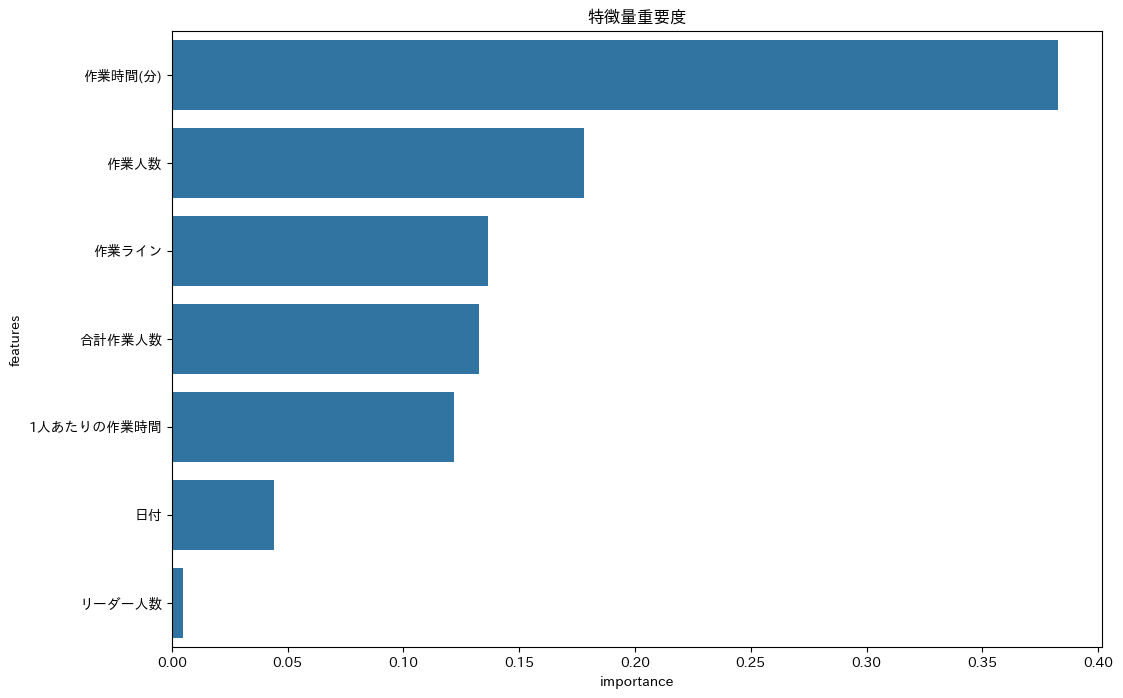

In [902]:
# 特徴量重要度を可視化
%pip install matplotlib seaborn japanize-matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import japanize_matplotlib
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=df)
plt.title('特徴量重要度')
plt.show()

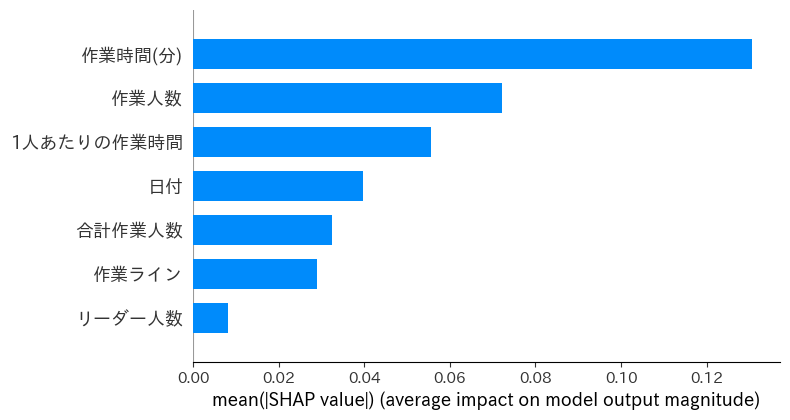

In [903]:
# SHAP値を計算
import shap
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# SHAP値を可視化
shap.summary_plot(shap_values, X_test, plot_type='bar')